# Assignment


You have already picked out the dataset you want to work with. If you have not, you can use this dataset [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Fit a Decision Tree model on your data. 
3. I want to see the training and testing accuracy of your model. So do split your data before modelling.


### Brownie Points (Extra 15 points)
- Lastly, i want to see a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.



Best of luck !!

![](https://media.tenor.com/J6BNrGi_wv8AAAAC/funny-meme.gif)


# ---------------------------------------------------------------------------------------------------------------

# Table of contents

    1--------------Importing the libraries
    2--------------Data cleaning.(Removing the unecessary columns and na values)
    3--------------EDA(Exploratory data analysis)
    4--------------Label Encoding
    6--------------Train test split
    7--------------Decision tree
    8--------------Accuracy score and confusion matrix

# ---------------------------------------------------------------------------------------------------------------

In [2]:
# Importing all the libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset and saving it in a variable df.
df=pd.read_csv("Weather dataset dated.csv").iloc[1:26328]

# Data preprocessing

In [4]:
# Preparing the data for EDA.
df['Year']=df['Year'].astype('int')
df['Month']=df['Month'].astype('int')
df=df.dropna()
df.pop('Loud Cover')
df.pop('Daily Summary')

1                        Partly cloudy throughout the day.
2                        Partly cloudy throughout the day.
3                        Partly cloudy throughout the day.
4                        Partly cloudy throughout the day.
5                        Partly cloudy throughout the day.
                               ...                        
26323    Partly cloudy starting in the morning continui...
26324    Partly cloudy starting in the morning continui...
26325    Partly cloudy starting in the morning continui...
26326    Partly cloudy starting in the morning continui...
26327    Partly cloudy starting in the morning continui...
Name: Daily Summary, Length: 26327, dtype: object

In [5]:
df

,Year,Month,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
1,2006,4,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006,4,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006,4,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006,4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
5,2006,4,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66
...,...,...,...,...,...,...,...,...,...,...,...
26323,2008,9,Partly Cloudy,rain,21.083333,21.083333,0.50,8.9999,351,9.9820,1019.77
26324,2008,9,Clear,rain,18.950000,18.950000,0.61,4.5885,16,10.3523,1020.28
26325,2008,9,Clear,rain,17.127778,17.127778,0.68,1.5295,30,9.9820,1020.47
26326,2008,9,Clear,rain,15.488889,15.488889,0.76,0.0000,0,15.8263,1020.68


# EDA begins----------------------------------------------------------------------------------------------

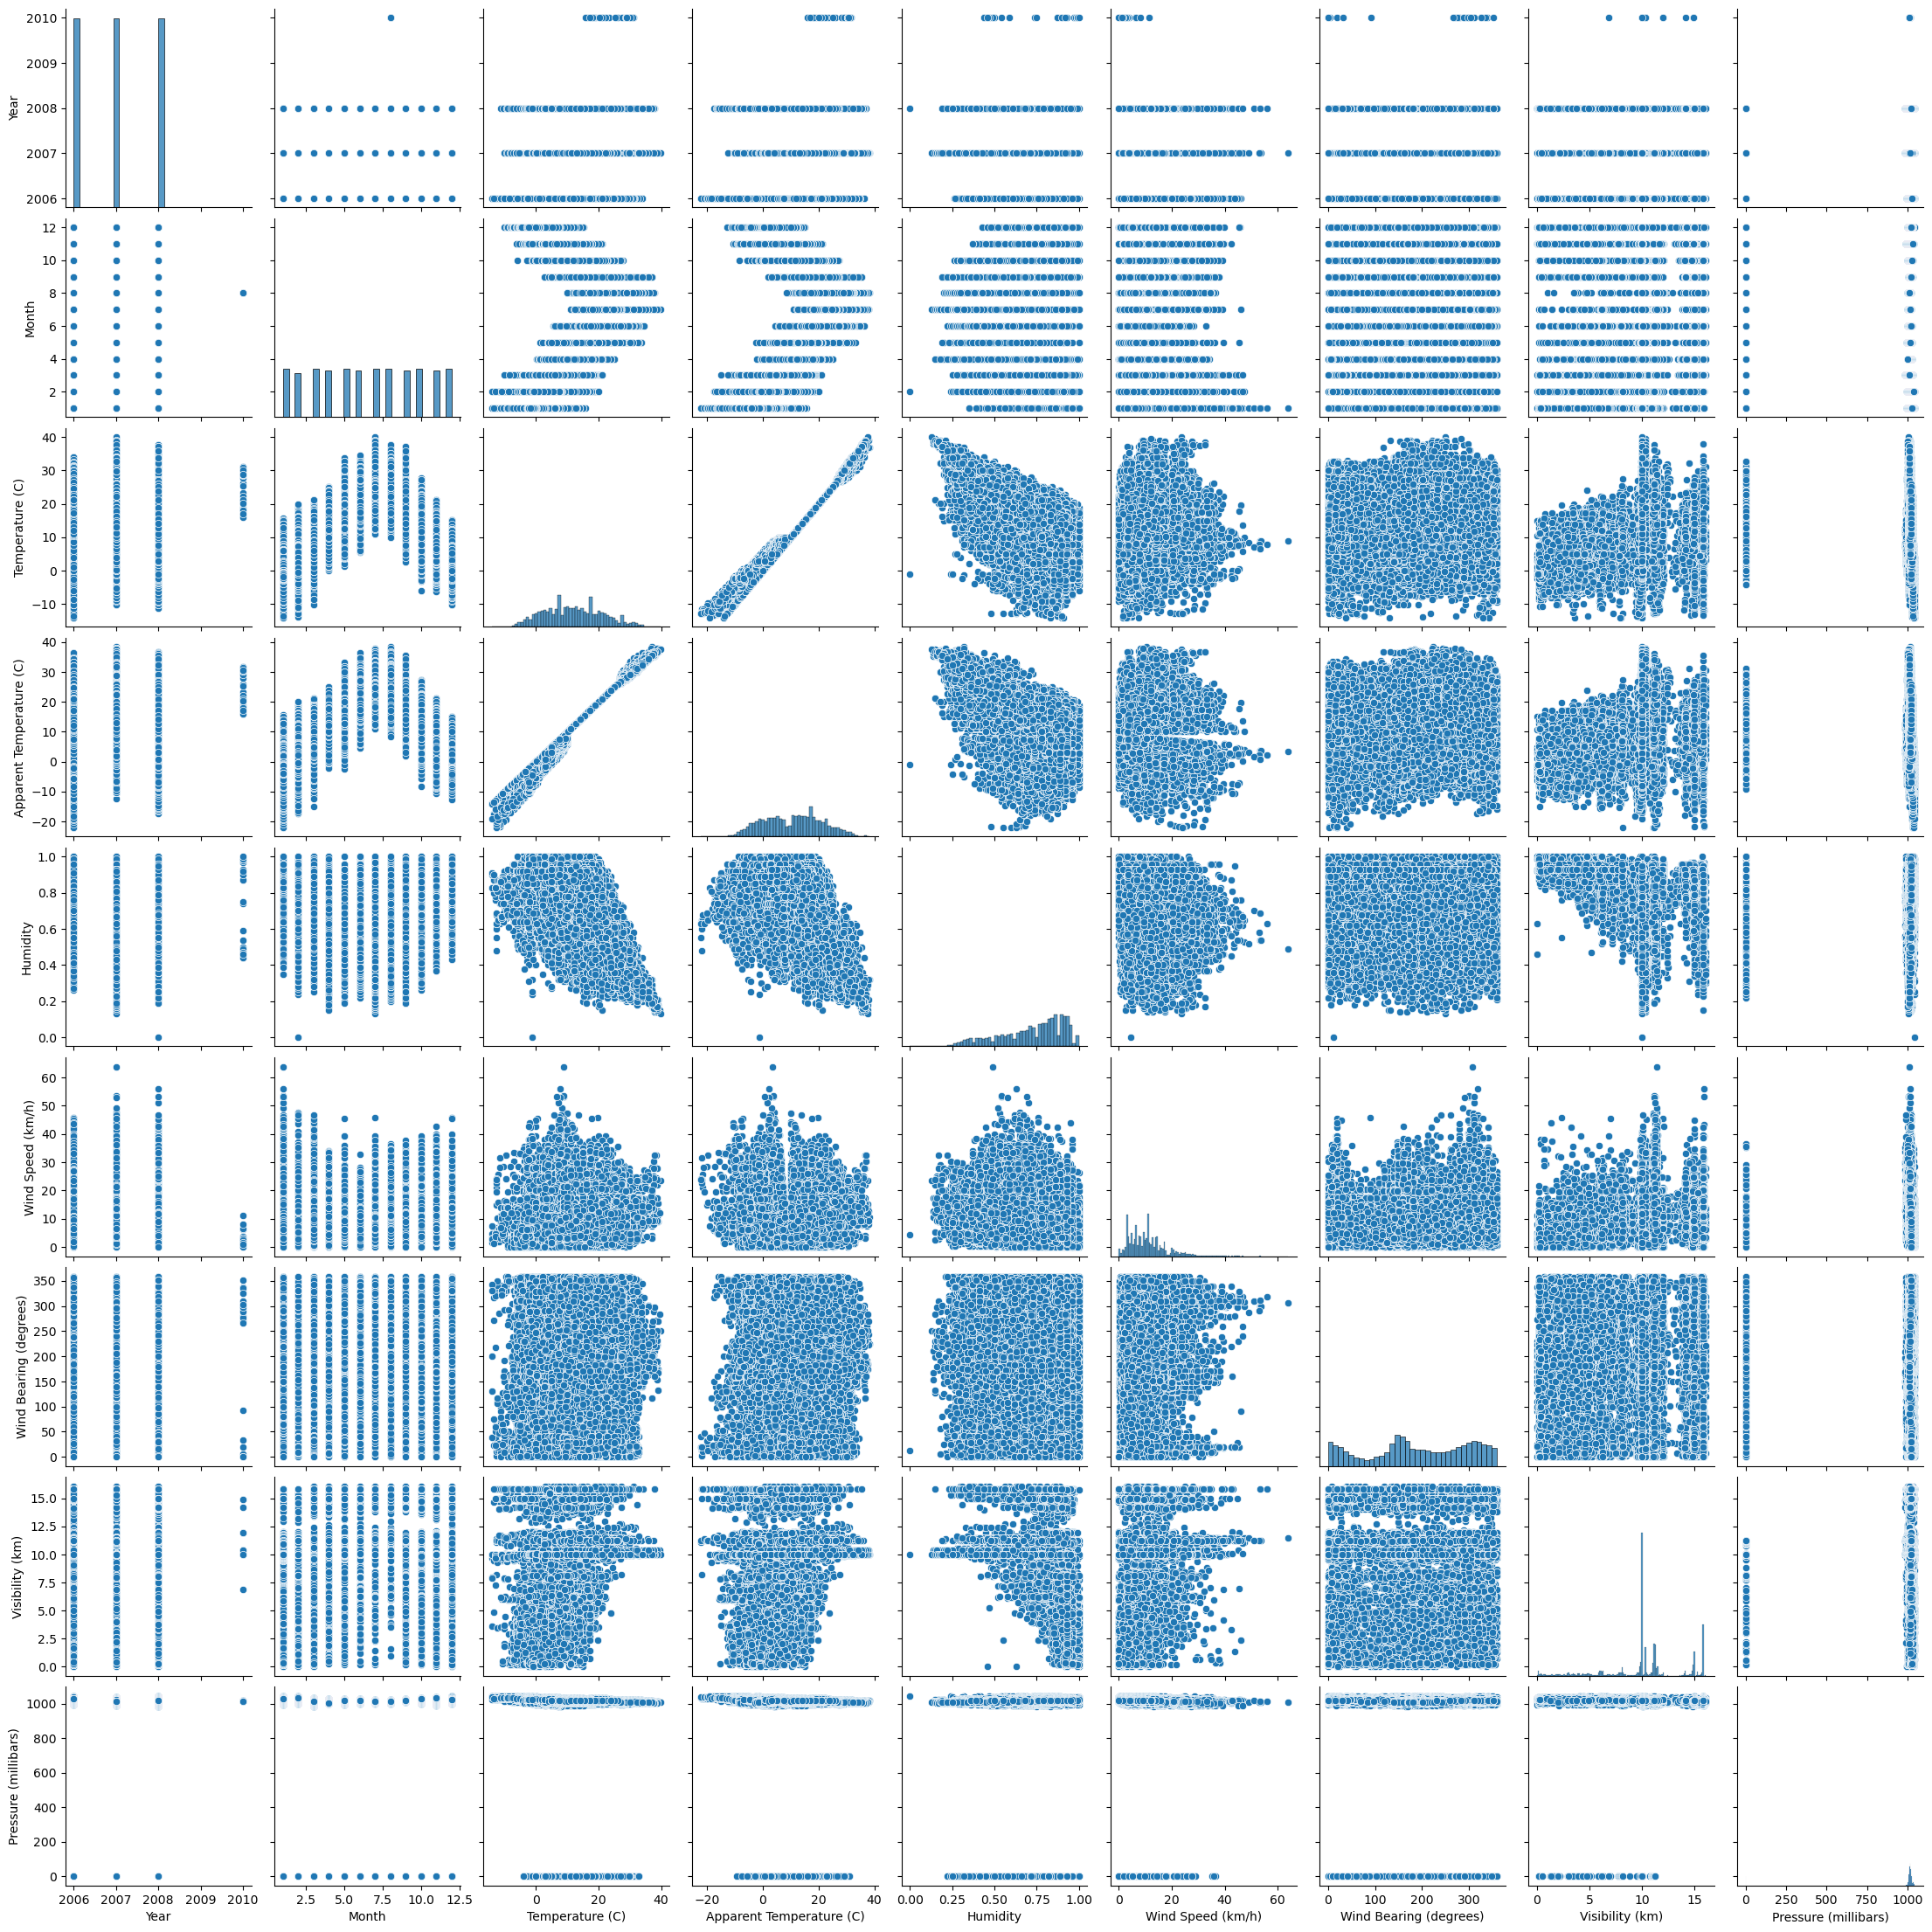

In [7]:
# Making a pairplot to see the relation among the numerical variables
sns.pairplot(df)

# From the above scatter plots we can conclude that there is no correlation among the various numerical variable present in this dataset, so sadly we cannot make any scatter plots as there is no point plotting them. Lets look at the other options at our disposal.

# ---------------------------------------------------------------------------------------------------------------

# Year wise humidity

<AxesSubplot:xlabel='Year', ylabel='Humidity'>

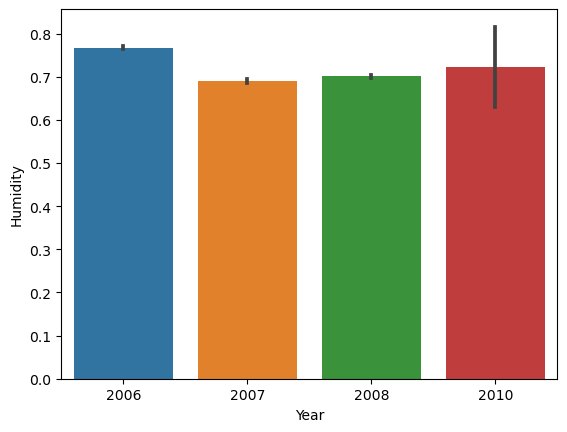

In [8]:
# Making a bar plot using seaborn
sns.barplot(x="Year", y="Humidity", data=df)

>The maximum degree of humidity was experienced in the year 2006 followed by 2010. Also its a safe assumption that be it any year we can be damn sure that the humidity will be more than 0.6 %.

# Month vs wind speed

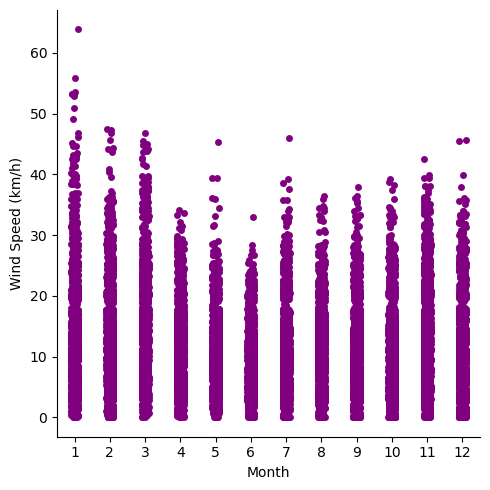

In [9]:
# Plotting a catplot using seaborn.
sns.catplot(data=df, x="Month", y="Wind Speed (km/h)",color='purple')

>The 1 month of the year experiences maximum amount of wind speed which can even cross a destructive 60km/hr. Also 30km/hr of wind speed is experienced in every month, a wind speed beyond this varies from month to month. Also June experiences lowest wind speed.

# Relation b/w humidity and precip type

<AxesSubplot:xlabel='Precip Type', ylabel='Humidity'>

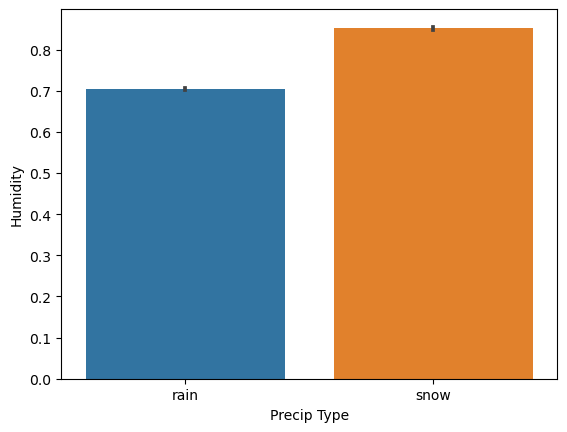

In [10]:
# Plotting barplots using seaborn to compare precip type and humidity.
sns.barplot(x="Precip Type", y="Humidity", data=df)

>Snow leads to a greater degree of humidity than rain. Generally speaking, when snow falls, the air temperature is usually colder than when it rains. Cold air can hold less moisture than warm air, so when the snow falls, it can cause the air to become more saturated with moisture, leading to a higher relative humidity.

# Box plotting the visibility

<AxesSubplot:>

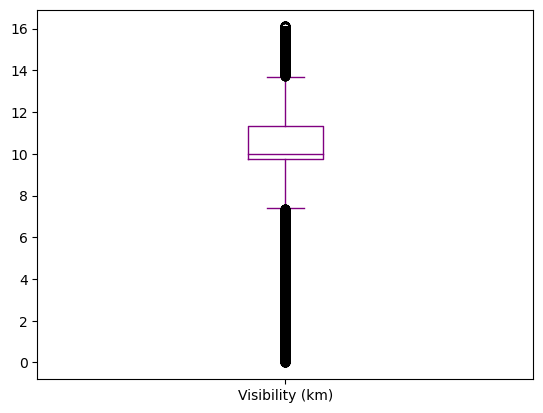

In [11]:
# Making a box plot of visibility to understand it better. 
df[['Visibility (km)']].plot(kind='box',color="purple")

>The box plot is a perfect example to explain the degree to which the weather may impact the visibility.The mean visibility is close to 10km. The range of visibility varies approximately from 8-14 kms. 

>But there are myraid number of outliers in this boxplot so much so that the visibility can reach from 0 km to 16km. This just gives us an idea that the weather of a region can make us completely blind (not literally) or it can make far-away distant things visible to us.

<AxesSubplot:>

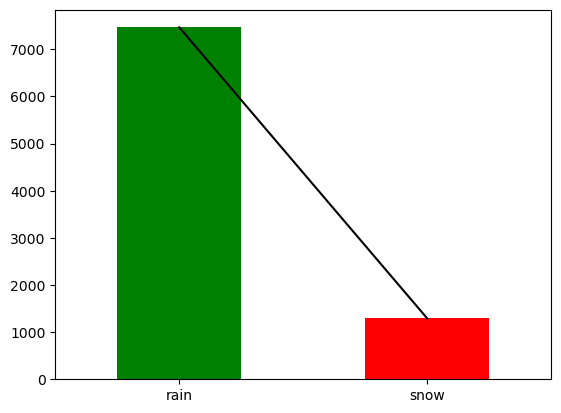

In [11]:
# Comparing the precip type for the year 2006.
df_2006['Precip Type'].value_counts().plot(kind='bar',color=('green','red'))
df_2006['Precip Type'].value_counts().plot(kind='line',color=('black'))

>As we saw in the word cloud before, that the weather was majorly cloudy in 2006. That might be the reason why the year 2006 experienced way more rainfall than snow as depicted by the bar graph above.

# Wordcloud (Year 2007)

In [ ]:
# Genrating the text and setting the background color

daily_summary_text_2007 = " ".join(df_2007["Daily Summary"].values)
wordcloud = WordCloud(width=800, height=800, background_color='yellow')
wordcloud.generate(daily_summary_text_2007)

In [ ]:
# Plotting the word cloud.

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Comparing the precip type for the year 2007.

df_2007['Precip Type'].value_counts().plot(kind='bar',color=('green','red'))
df_2007['Precip Type'].value_counts().plot(kind='line',color=('black'))

In this case as well, the region is experiencing more rain becuase of cloudy weather.

# Wordcloud (Year 2008)

In [ ]:
# Genrating the text and setting the background color

daily_summary_text_2008 = " ".join(df_2008["Daily Summary"].values)
wordcloud = WordCloud(width=800, height=800, background_color='Gray')
wordcloud.generate(daily_summary_text_2008)

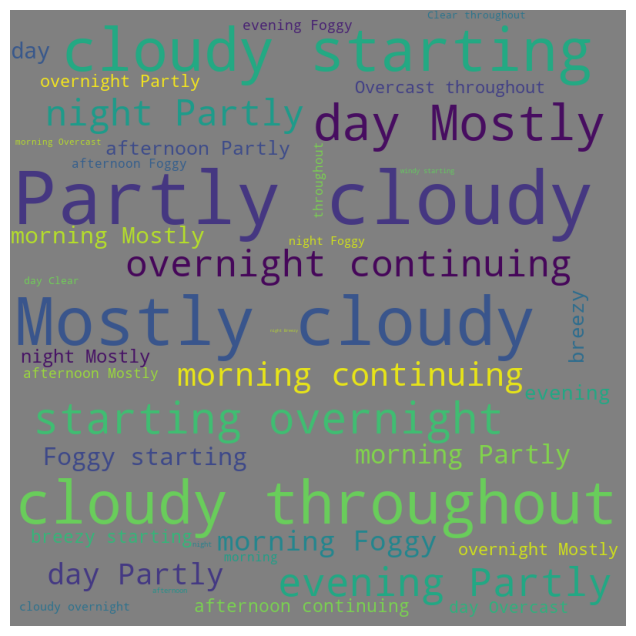

In [30]:
# Finally plotting the word cloud.

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

>The idea was to find the the weather patterns across different years by making year wise word_clouds. But it seems that in all these year, the weather was partly/mostly cloudy, meaning there was not contrast in the weather patterns. 

>Because of which the analysis of this year's weather remains the same as the precious one i.e. the region is experiencing more rain because of cloudy weather.

<AxesSubplot:>

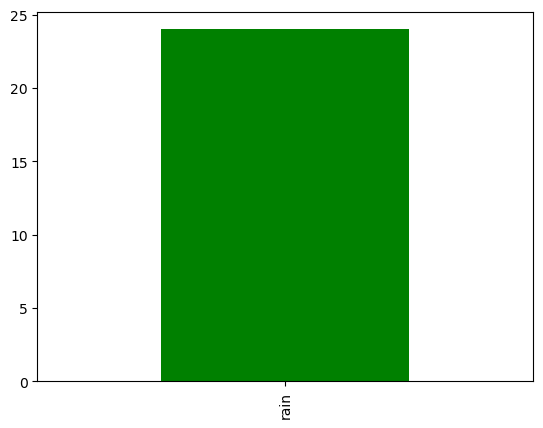

In [72]:
# Makking a bar chart for the precip type in the year 2010.
df_2010['Precip Type'].value_counts().plot(kind='bar',color=('green','red'))

>The year 2010 only expericed rain, and there was no snow. Lets try to find the reason for the same.

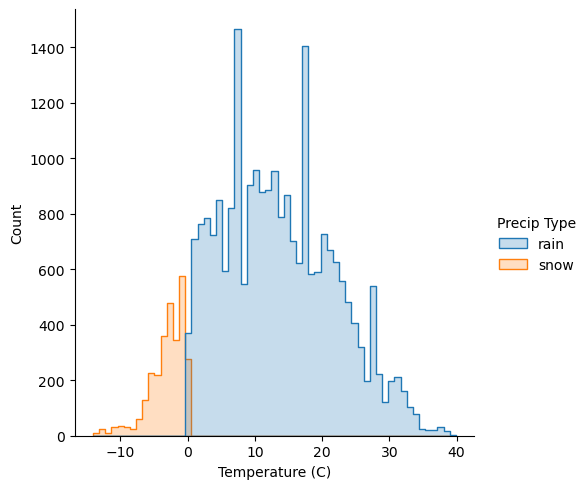

In [79]:
# Plotting the distribution plot of temperature and precip type.
sns.displot(df, x="Temperature (C)", hue="Precip Type", element="step")

>In the graph above it is very evident that snow occurs when the temperature os either 0 or below, in this case maximum snow was
experienced when when temperature was between -5 to 0. 

>Also rain is experienced when the temperature be above 0 degree with the maximum rain being expericed when the temperature is between 5-20 degrees, also there is a certain temperature near 0 degrees where both snow and rain can be experienced. 

>The point we need to take from this graph is that more temperature more rain, less temperature less rain.

<AxesSubplot:xlabel='Year', ylabel='Temperature (C)'>

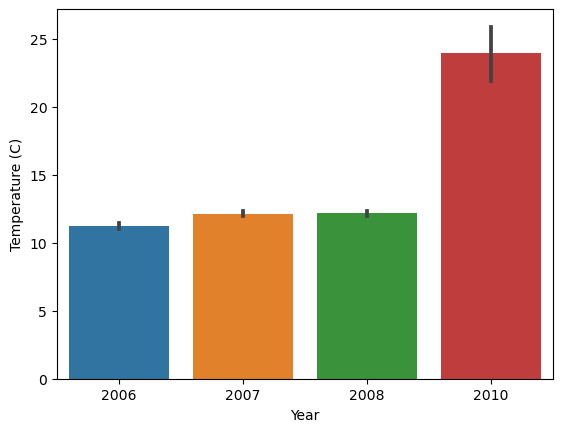

In [85]:
# Plotting the bar plot of temperature for different years.
sns.barplot(x="Year", y="Temperature (C)", data=df)

>And as we all might have guessed by now that the year 2010 experienced the maximum temperature because of which the scope of snow occurence was rather bleak and the weather was more welcoming for rain.

# All about humidity

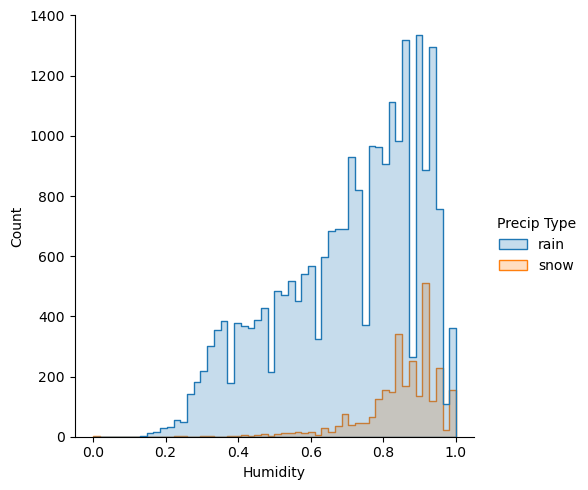

In [82]:
# Plotting the distribution plot of humidity with different precip types.
sns.displot(df, x="Humidity", hue="Precip Type", element="step")

>Most of the areas experienced snow when the humidity was between 0.8 and 0.9 and rain when the humidity was 0.6 to 0.9. 

>Another observation from the graph can be that rain can occur even when the humidity is low like 0.2 in this case, but for the snow to occur, the humidity is supposed to touch a certain number like in the graph above we can deduce that atleast a humidity of 0.7 is required for the snow to occur.

# (Lets look at some numerical variables)

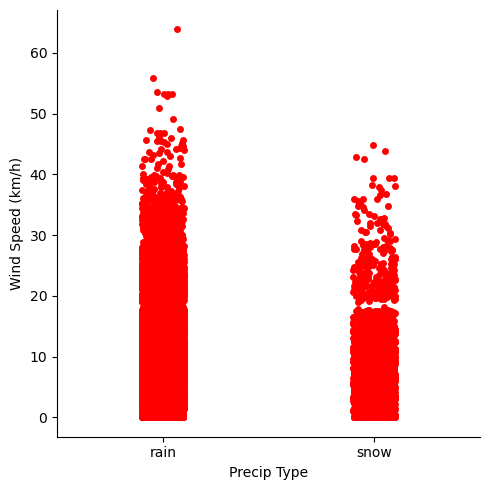

In [8]:
# Plotting a cat plot between precip type and wind speed.
sns.catplot(data=df, x="Precip Type", y="Wind Speed (km/h)",color='red')

>Wind speed upto 18km is conducive for both rain and snow. But beyond that the snow frequency beings to fall, however rain is still experienced in the full swing upto 38 km of wind speed. 

>So we can say that rain can be experienced in any wind speed, but for the snow to occur, a safe wind speed would be below 30.

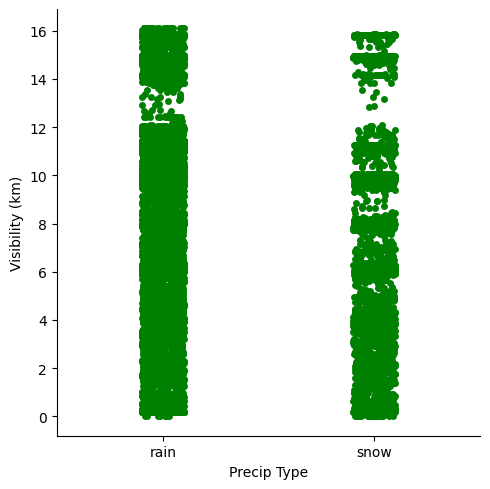

In [9]:
# Plotting a cat plot between precip type and visibility.
sns.catplot(data=df, x="Precip Type", y="Visibility (km)",color='green')

>A visibility from 12-14 km is hardly experienced irrespective of whether it is rainy or snowy. Also there are more instances of snow occurence below a visibility of 8 KM than above it.

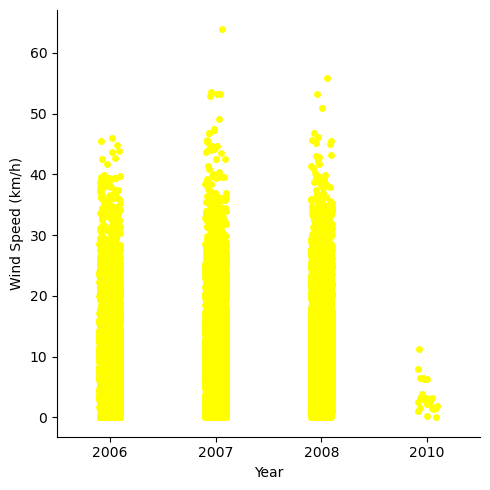

In [49]:
# Plotting a cat plot of wind speed in different years.
sns.catplot(data=df, x="Year", y="Wind Speed (km/h)",color='yellow')

>Every single year experienced wind speed upto 35 km (except in 2010). But a wind speed beyond 35 km varied from year to year. 2007 and 2008 experienced the highest wind speed. In 2007 there is an outlier in which a wind speed of whopping 65km/hr was recorded. 

>It might have could huge destruction in that particular area.

# Rain vs snow

<AxesSubplot:ylabel='Precip Type'>

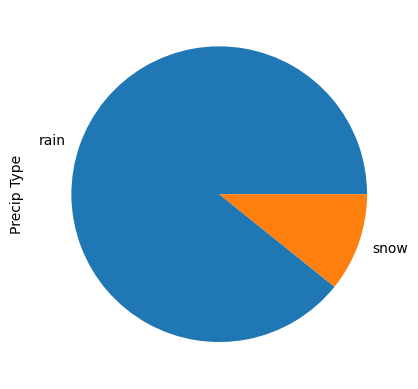

In [74]:
# Making a pie chart to compare of share of each precip type
df['Precip Type'].value_counts().plot(kind='pie')

>Rainy reason was being experienced maximum number of times and in certain cases snow.

>Given the huge rain-snow difference in this pie chart and the number of data points that we have, it is safe the assume that the climate this particular region is rainy in nature but sometimes the weather can also turn out to be snowy.

# Month vs temperature

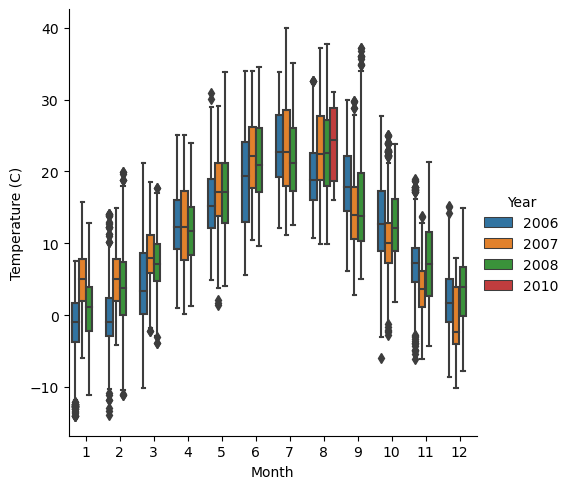

In [53]:
# Making monthly box plots of temperature in different years.
sns.catplot(data=df, x="Month", y="Temperature (C)", hue="Year", kind="box")

>Among all the 4 years and 12 months, the highest temperature ever recorded was the July Month(7) of 2007 and the lowest temperature ever was recorded in the January Month of 2006.

>Also the data for the year 2010 is only available for the 8th month of the which is August.


#  General Insight ---------------------------------------------------------------------------------------

<AxesSubplot:ylabel='Year'>

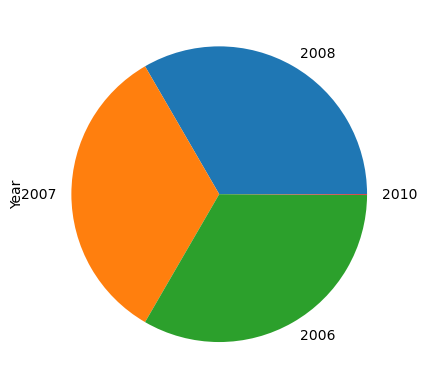

In [11]:
# Making a pie chart the data from different years.
df['Year'].value_counts().plot(kind='pie')

>This pie charts represents the uniformity in the collection of data from different years. Equal number of data points have been collected from each year to avoid any bias except for the year 2010, the data of which is only available for the month of August as we infered in the previous graph.

# Month wise humidity

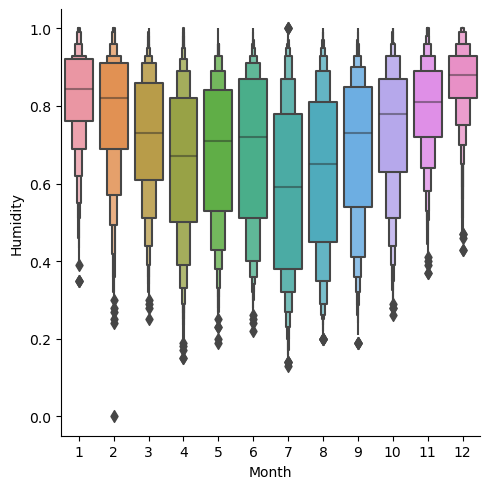

In [62]:
# Making multiple box plots of humidity experienced in different months.
sns.catplot(data=df,x="Month", y="Humidity", kind="boxen")

>Only the monthy data has been taken without the year to find the monthly patterns in the weather considering all the years.
Now as we can see that in the 7th month which is July, the humidity can touch the lowest approx 0.1. 

>Interestingly enough, July is also the month where the humidity is highly volatile as the range of humidity in this particular month is the highest. So if you are in the month of July get ready to experience surprizes in the humidity levels which can range from 0.1 to 1%.


![](https://media1.tenor.com/images/6082388bf4a8aa06d668f0def06931cf/tenor.gif?itemid=11188610)

# Year wise visibility

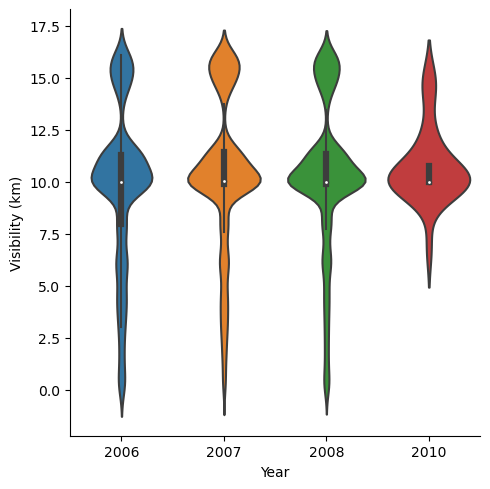

In [68]:
# Making a violin plot of visibility experienced across different years.
sns.catplot(data=df, x="Year", y="Visibility (km)", kind="violin")

>One can observe that majorly in all the years, visibility of 8-11 Km is experienced.Rarely do we see visibility upto 12.5 Km in any of these years.Also the year 2010 experiences the lowest range of visibility approximately from 5-16 kms. 

>Also the data of 2010 may not be considered as we are already aware about the dearth of data collection for thi year. 

>But if this was not the case that we could have concluded that 2010 was the safest year for travelling and transportation because atleast visibility upto 5km was experienced in this year.

# EDA ends-------------------------------------------------------------------------------------------------

In [18]:
col_list = ['Summary','Precip Type']

In [19]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

In [20]:
df

,Year,Month,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
1,2006,4,14,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006,4,12,0,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006,4,14,0,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006,4,12,0,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
5,2006,4,14,0,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66
...,...,...,...,...,...,...,...,...,...,...,...
26323,2008,9,14,0,21.083333,21.083333,0.50,8.9999,351,9.9820,1019.77
26324,2008,9,5,0,18.950000,18.950000,0.61,4.5885,16,10.3523,1020.28
26325,2008,9,5,0,17.127778,17.127778,0.68,1.5295,30,9.9820,1020.47
26326,2008,9,5,0,15.488889,15.488889,0.76,0.0000,0,15.8263,1020.68


# Train test split

In [21]:
# Import train-test scikit learn
from sklearn.model_selection import train_test_split

In [146]:
# Dropping the precip type from the data and saving all other variables in x
x = df.drop('Precip Type',axis=1)

# Saving the column precip type in y
y=df['Precip Type']

In [147]:
x

,Year,Month,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
1,2006,4,14,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006,4,12,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006,4,14,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006,4,12,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
5,2006,4,14,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66
...,...,...,...,...,...,...,...,...,...,...
26323,2008,9,14,21.083333,21.083333,0.50,8.9999,351,9.9820,1019.77
26324,2008,9,5,18.950000,18.950000,0.61,4.5885,16,10.3523,1020.28
26325,2008,9,5,17.127778,17.127778,0.68,1.5295,30,9.9820,1020.47
26326,2008,9,5,15.488889,15.488889,0.76,0.0000,0,15.8263,1020.68


In [148]:
y

1        0
2        0
3        0
4        0
5        0
        ..
26323    0
26324    0
26325    0
26326    0
26327    0
Name: Precip Type, Length: 26327, dtype: int32

In [149]:
# Performing the train test split.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.45)

# Decision tree begins
![](https://i.pinimg.com/originals/09/6a/1b/096a1bf6a241e704846ef93fdea18967.gif)

In [150]:
# Initializing the decision tree classifier
clf = DecisionTreeClassifier(min_samples_split=5500)

In [151]:
# Fitting the x and y train in the model.
clf = clf.fit(x_train, y_train)

In [152]:
# Importing tree from sklearn
from sklearn import tree

[Text(0.5, 0.75, 'X[3] <= 0.003\ngini = 0.194\nsamples = 14479\nvalue = [12899, 1580]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1580\nvalue = [0, 1580]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 12899\nvalue = [12899, 0]')]

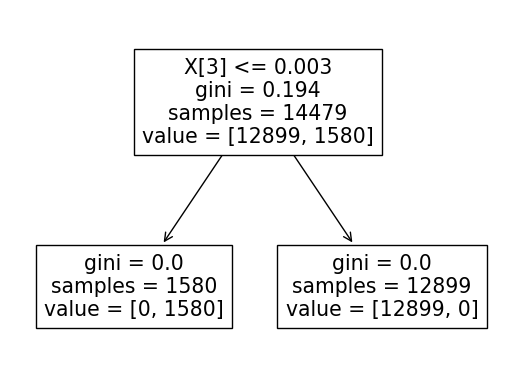

In [153]:
# Finally plotting the decision tree.
tree.plot_tree(clf)

# Decision tree training--------------------------------------------------------------------------------

# Looking at the train accuracy

In [154]:
# Importing the necessary libraries.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [155]:
# Predicting the values for x train and saving it in a variable
train_pred = clf.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
train_acc

1.0

In [156]:
# Making the confusion matrix to check the accuracy
cm = confusion_matrix(y_train, train_pred)

In [157]:
# Displaying the confusion matrix in the array form.
cm

array([[12899,     0],
       [    0,  1580]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

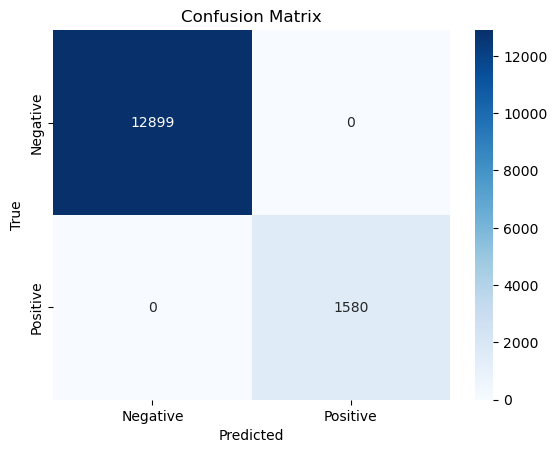

In [158]:
# Displaying the confusion matrix in the form of a heat map along with the title, x and y label.
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Decision tree testing--------------------------------------------------------------------------------

# Looking at the test accuracy

In [159]:
# Predicting the values for x train and saving it in a variabletest_pred = clf.predict(x_test)
test_acc = accuracy_score(y_test, test_pred)
test_acc

1.0

In [160]:
test_pred

array([0, 0, 0, ..., 1, 0, 0])

In [170]:
# Making the confusion matrix to check the accuracy
cm = confusion_matrix(y_test, test_pred)

Text(0.5, 1.0, 'Confusion Matrix')

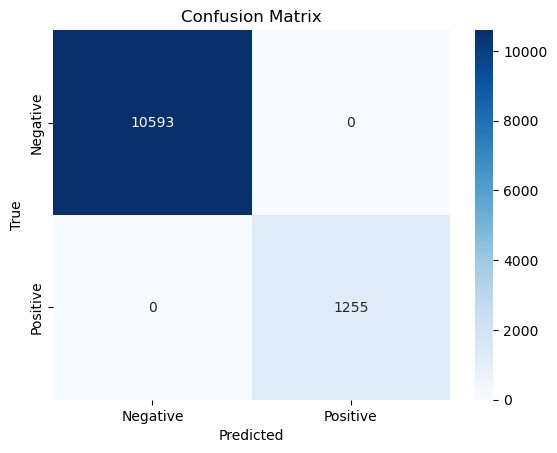

In [171]:
# Displaying the confusion matrix in the form of a heat map along with the title, x and y label.
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# ---------------------------------------------------------------------------------------------------------------

# Making predictions of daily summary using decision tree by putting randon values

In [169]:
clf.predict([[2006,4,14,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63]])

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# Creating a single function for all this hassle:

In [167]:
def my_function(a,b,c,d,e,f,g,h,i,j):
    temp=[]
    temp.append(clf.predict([[a,b,c,d,e,f,g,h,i,j]]))
    return temp

In [168]:
my_function(2006,4,14,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[array([0])]

# The end

![](https://media1.tenor.com/images/adadfdd771ed29cb7a7e42ba709ace5d/tenor.gif?itemid=14206284)

# To predict a categorical variable we use classifier.


# To predict a numerical variable we use regressor.